In [ ]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from  tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, accuracy_score,f1_score

In [ ]:
EPOCHS = 30
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((196, 196))
image_size = 0
directory_root = '/content/drive/MyDrive/PLANT_DISEASES_DATASET/RESIZE'
width=196
height=196
depth=3

In [ ]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")

        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:

            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
            print(f"[INFO] Processing {plant_disease_folder} {len(plant_disease_image_list)}")

            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True or image_directory.endswith(".JPEG") == True:
                    #img=convert_image_to_array(image_directory)
                    image = cv2.imread(image_directory)
                    if image is not None :
                        image = cv2.resize(image, (196, 196)).flatten()
                        image_list.append(image)
                        label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing APPLE_HEALTHY 1500
[INFO] Processing APPLE_RUST 1500
[INFO] Processing APPLE_SCAB 1500
[INFO] Processing CASHEW_ANTHRACNOSE 1500
[INFO] Processing CASHEW_HEALTHY 1500
[INFO] Processing CASHEW_RED_RUST 1500
[INFO] Processing CASSAVA_BROWN_SPOT 1500
[INFO] Processing CASSAVA_HEALTHY 1500
[INFO] Processing CASSAVA_MOSAIC_VIRUS 1500
[INFO] Processing COCOA_ANTHRACNOSE 1500
[INFO] Processing COCOA_CSSVD 1500
[INFO] Processing COCOA_HEALTHY 1500
[INFO] Processing GRAPE_BLACK_MEASLES 1500
[INFO] Processing GRAPE_BLACK_ROT 1500
[INFO] Processing GRAPE_HEALTHY 1500
[INFO] Processing GROUNDNUT_HEALTHY 1500
[INFO] Processing GROUNDNUT_LEAF_SPOT 1500
[INFO] Processing GROUNDNUT_RUST 1500
[INFO] Processing MAIZE_HEALTHY 1500
[INFO] Processing MAIZE_MOSAIC_VIRUS 1500
[INFO] Processing MAIZE_STREAK_VIRUS 1500
[INFO] Processing POTATO_EARLY_BLIGHT 1500
[INFO] Processing POTATO_HEALTHY 1500
[INFO] Processing POTATO_LATE_BLIGHT 1500
[INFO] Processing TOMATO_EA

In [ ]:
image_size = len(image_list)

In [ ]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [ ]:
print(label_binarizer.classes_)

['APPLE_HEALTHY' 'APPLE_RUST' 'APPLE_SCAB' 'BEANS_ANGULAR_LEAF_SPOT'
 'BEANS_HEALTHY' 'BEANS_RUST' 'CASHEW_ANTHRACNOSE' 'CASHEW_HEALTHY'
 'CASHEW_RED_RUST' 'CASSAVA_BROWN_SPOT' 'CASSAVA_HEALTHY'
 'CASSAVA_MOSAIC_VIRUS' 'COCOA_ANTHRACNOSE' 'COCOA_CSSVD' 'COCOA_HEALTHY'
 'GRAPE_BLACK_MEASLES' 'GRAPE_BLACK_ROT' 'GRAPE_HEALTHY'
 'GROUNDNUT_HEALTHY' 'GROUNDNUT_LEAF_SPOT' 'GROUNDNUT_RUST'
 'MAIZE_HEALTHY' 'MAIZE_MOSAIC_VIRUS' 'MAIZE_STREAK_VIRUS'
 'POTATO_EARLY_BLIGHT' 'POTATO_HEALTHY' 'POTATO_LATE_BLIGHT'
 'TOMATO_EARLY_BLIGHT' 'TOMATO_HEALTHY' 'TOMATO_SEPTORIA_LEAF_SPOT']


In [ ]:
#np_image_list = np.array(image_list, dtype=np.float16) / 225.0
np_image_list = np.array(image_list, dtype="float") / 255.0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42)

In [ ]:
model = Sequential()
inputShape = (196,196,3)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (3, 196, 196)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(196, 196, 3)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      896       
                                                                 
 activation (Activation)     (None, 196, 196, 32)      0         
                                                                 
 batch_normalization (Batch  (None, 196, 196, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 65, 65, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 65, 65, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 65, 65, 64)        1

In [ ]:
opt = tf.keras.optimizers.legacy.Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
x_train_reshaped = x_train.reshape((-1,196, 196, 3))
x_test_reshaped = x_test.reshape((-1,196, 196, 3))

In [ ]:
import time
time1 = time.time()   # to measure time taken
H = model.fit(x_train_reshaped, y_train, validation_data=(x_test_reshaped, y_test), epochs=30, batch_size=32)
print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken

Epoch 1/30
150/150 [==============================] - 4s 28ms/step - loss: 0.0018 - accuracy: 0.9975 - val_loss: 0.0472 - val_accuracy: 0.8450
Epoch 2/30
150/150 [==============================] - 3s 21ms/step - loss: 0.0014 - accuracy: 0.9987 - val_loss: 0.0460 - val_accuracy: 0.8750
Epoch 3/30
150/150 [==============================] - 3s 21ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0516 - val_accuracy: 0.8433
Epoch 4/30
150/150 [==============================] - 3s 21ms/step - loss: 0.0014 - accuracy: 0.9981 - val_loss: 0.2468 - val_accuracy: 0.4142
Epoch 5/30
150/150 [==============================] - 3s 21ms/step - loss: 0.0028 - accuracy: 0.9967 - val_loss: 0.0565 - val_accuracy: 0.8392
Epoch 6/30
150/150 [==============================] - 3s 21ms/step - loss: 0.0020 - accuracy: 0.9975 - val_loss: 0.0689 - val_accuracy: 0.7908
Epoch 7/30
150/150 [==============================] - 3s 21ms/step - loss: 0.0015 - accuracy: 0.9975 - val_loss: 0.0542 - val_accuracy: 0.8450

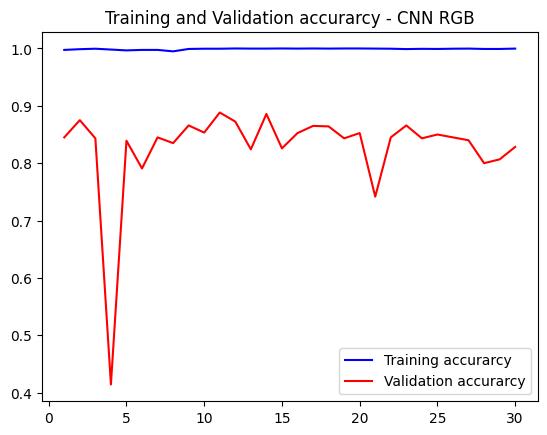

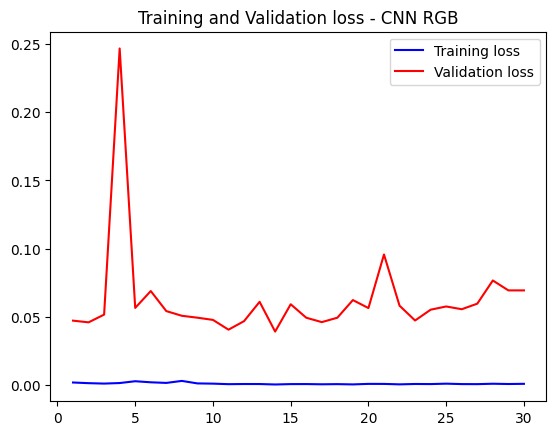

In [ ]:
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy - CNN RGB')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss - CNN RGB')
plt.legend()
plt.show()

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test_reshaped, y_test)
print(f"Test Accuracy: {scores[1]*100}")

In [ ]:
# save the model to disk
print("[INFO] Saving model...")
pickle.dump(model,open('cnn_model.pkl', 'wb'))

38/38 [==============================] - 0s 7ms/step
Accuracy   : 0.8541333333333334
Precision : 0.8541333333333334
Recall    : 0.8541333333333334
F1-score  : 0.8531333333333334


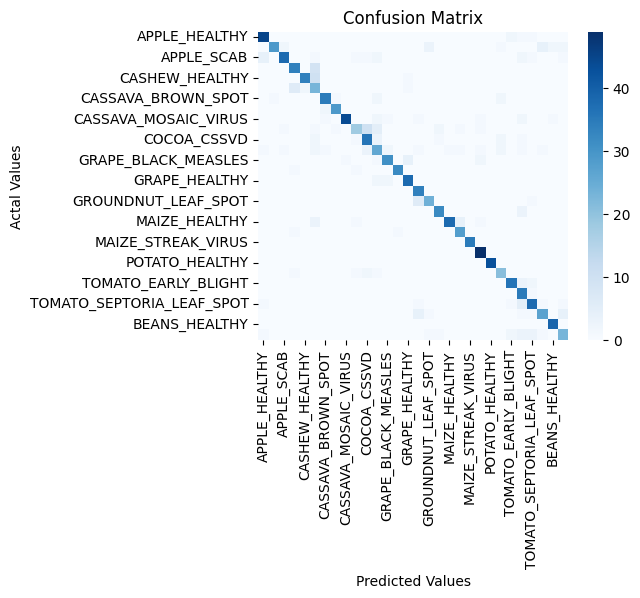

In [ ]:
y_pred = model.predict(x_test_reshaped)
y_pred=np.argmax(y_pred, axis=1)
#y_test=np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred, average='micro')
print("Precision :", precision)
recall = recall_score(y_test, y_pred, average='micro')
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred, average='weighted')
print("F1-score  :", F1_score)
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['APPLE_HEALTHY','APPLE_RUST','APPLE_SCAB','CASHEW_ANTHRACNOSE','CASHEW_HEALTHY','CASHEW_RED_RUST','CASSAVA_BROWN_SPOT','CASSAVA_HEALTHY','CASSAVA_MOSAIC_VIRUS','COCOA_ANTHRACNOSE','COCOA_CSSVD','COCOA_HEALTHY','GRAPE_BLACK_MEASLES','GRAPE_BLACK_ROT','GRAPE_HEALTHY','GROUNDNUT_HEALTHY','GROUNDNUT_LEAF_SPOT','GROUNDNUT_RUST','MAIZE_HEALTHY','MAIZE_MOSAIC_VIRUS','MAIZE_STREAK_VIRUS','POTATO_EARLY_BLIGHT','POTATO_HEALTHY','POTATO_LATE_BLIGHT','TOMATO_EARLY_BLIGHT','TOMATO_HEALTHY','TOMATO_SEPTORIA_LEAF_SPOT','BEANS_ANGULAR_LEAF_SPOT','BEANS_HEALTHY','BEANS_RUST'],
                     columns = ['APPLE_HEALTHY','APPLE_RUST','APPLE_SCAB','CASHEW_ANTHRACNOSE','CASHEW_HEALTHY','CASHEW_RED_RUST','CASSAVA_BROWN_SPOT','CASSAVA_HEALTHY','CASSAVA_MOSAIC_VIRUS','COCOA_ANTHRACNOSE','COCOA_CSSVD','COCOA_HEALTHY','GRAPE_BLACK_MEASLES','GRAPE_BLACK_ROT','GRAPE_HEALTHY','GROUNDNUT_HEALTHY','GROUNDNUT_LEAF_SPOT','GROUNDNUT_RUST','MAIZE_HEALTHY','MAIZE_MOSAIC_VIRUS','MAIZE_STREAK_VIRUS','POTATO_EARLY_BLIGHT','POTATO_HEALTHY','POTATO_LATE_BLIGHT','TOMATO_EARLY_BLIGHT','TOMATO_HEALTHY','TOMATO_SEPTORIA_LEAF_SPOT','BEANS_ANGULAR_LEAF_SPOT','BEANS_HEALTHY','BEANS_RUST'])


plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()



In [ ]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 17.4 MB/s eta 0:00:00


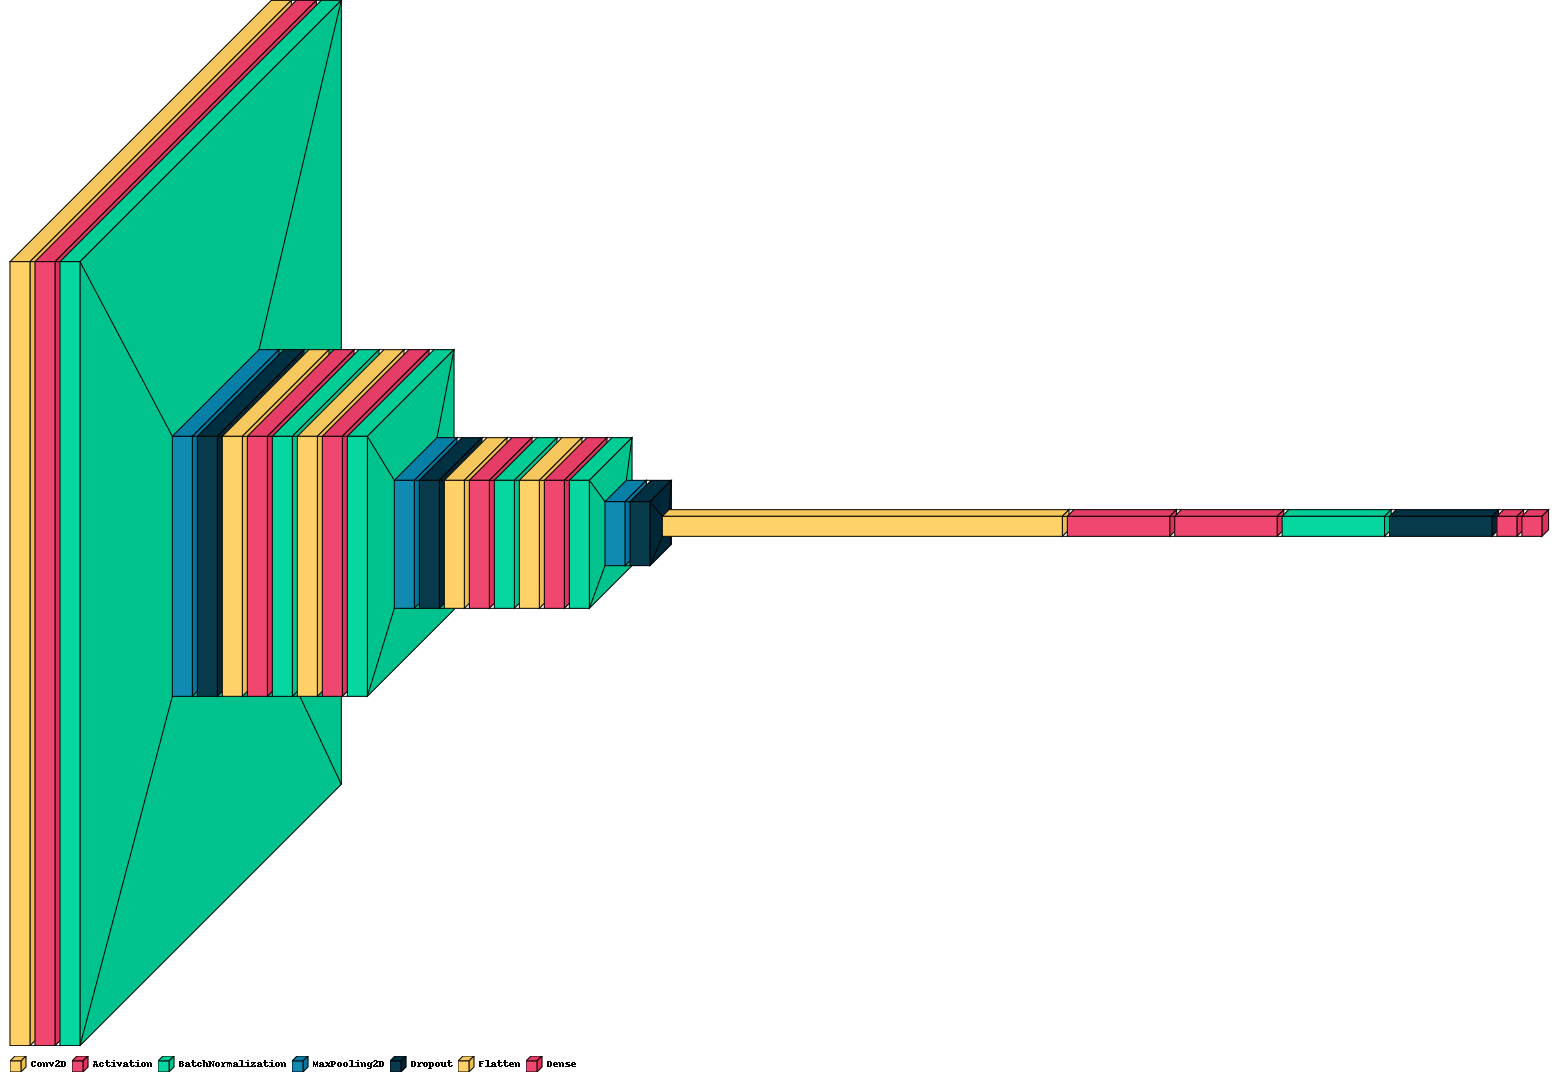

In [ ]:
import visualkeras


visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model, legend=True,spacing=5)

In [ ]:
!sudo apt-get install graphviz
! pip install graphviz
! pip install pydot

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


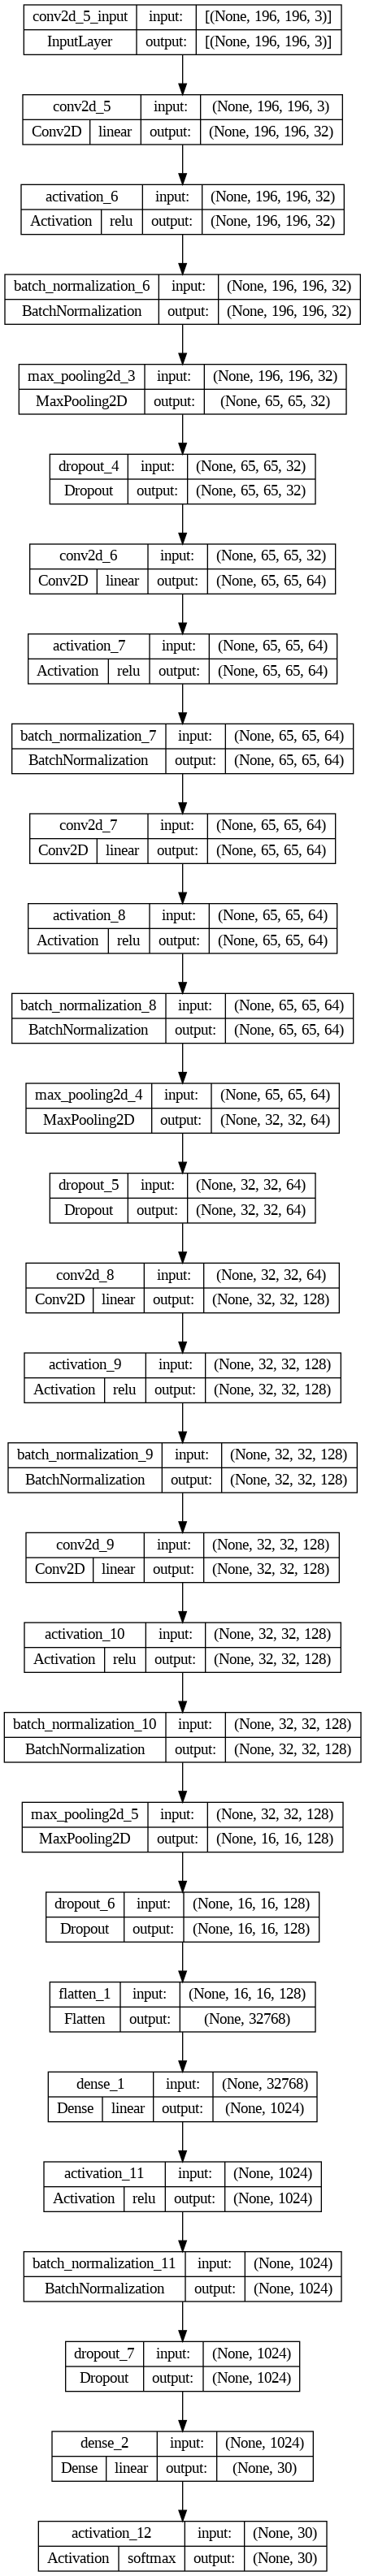

In [ ]:
from tensorflow.keras.utils import plot_model
# initialize LeNet and then write the network architecture
# visualization graph to disk
plot_model(model, show_layer_activations=True, rankdir='DR',dpi=96,expand_nested=True, show_shapes=True)

In [ ]:
from torchviz import make_dot

In [ ]:
!pip install torchview
from torchview import draw_graph
